$$
\begin{align*}
\text{Grid}&: n \times m \\
\text{Observations}&: \{(N/S/nop, W/E/nop)\}_{t=1}^{T} \\
\end{align*}
$$

$$
\begin{align*}
P(x | O) &= \frac{P(O|x) \cdot P(x)}{P(O)} \\
P(x | O) &\propto P(O|x) \cdot P(x) \\
P(O | x) &= \prod_{t=1}^{T} P(x_t | x) \\
P(O | y) &= \prod_{t=1}^{T} P(y_t | y)
\end{align*}
$$

For individual observations, we have:
$$
\begin{align*}
\prod_{t=1}^{T} P(x_t | x) &= P(x_t \in N | x)^{|N|} \cdot P(x_t \in S | x)^{|S|} \cdot P(x_t \in nop | x)^{|nop|} \\
&= \left( \frac{x-1}{n} \right)^{|N|} \cdot \left( \frac{n-x}{n} \right)^{|S|} \cdot \left( \frac{1}{n} \right)^{|nop|} \\
\prod_{t=1}^{T} P(y_t | y) &= P(y_t \in W | y)^{|W|} \cdot P(y_t \in E | y)^{|E|} \cdot P(y_t \in nop | y)^{|nop|} \\
&= \left( \frac{y-1}{m} \right)^{|W|} \cdot \left( \frac{m-y}{m} \right)^{|E|} \cdot \left( \frac{1}{m} \right)^{|nop|} \\
\end{align*}
$$

The best guess is then:
$$
\begin{align*}
P(x^* | O) &= \arg\max_{x} P(O|x) \cdot P(x) \\
P(y^* | O) &= \arg\max_{y} P(O|y) \cdot P(y) 
\end{align*}
$$

In [1]:
import numpy as np
from collections import Counter
from tqdm import tqdm

In [2]:
def delta(p1, p2):
    if p1 < p2:
        return 0
    if p1 == p2:
        return 1
    return 2

def p_obs_x(x, obs):
    return ((x - 1)/n)**obs.get('n',0) * \
           ((n - x)/n)**obs.get('s',0) * \
           (1 / n)**obs.get('xnop',0)

def p_obs_y(y, obs):
    return ((y - 1)/m)**obs.get('w',0) * \
           ((m - y)/m)**obs.get('e',0) * \
           (1 / m)**obs.get('ynop',0)

r = np.random.randint

In [3]:
def experiment(n, m, T):
    grid = np.array([[' ' for _ in range(m)] for _ in range(n)])

    xI, yI = r(n), r(m)
    grid[xI, yI] = 'X'

    cnt = {'x': Counter(), 'y': Counter()}

    for t in range(1, T+1):
        xt, yt = r(n), r(m)

        hx = ['n', 'xnop', 's'][delta(xt, xI)]
        hy = ['w', 'ynop', 'e'][delta(yt, yI)]

        cnt['x'][hx] += 1
        cnt['y'][hy] += 1

    cnt = {c: dict(cnt[c].most_common()) for c in cnt}

    xS = np.argmax(list(map(lambda x: p_obs_x(x, cnt['x']), range(n))))
    yS = np.argmax(list(map(lambda y: p_obs_y(y, cnt['y']), range(m))))

    grid[xS, yS] = 'G'

    return grid, (xI, yI), (xS, yS)

In [6]:
n, m = 100, 100
E = 500

dist = {}

for T in tqdm(range(10, 101)):

    d = 0
    for _ in range(E):
        grid, pI, pS = experiment(n, m, T)
        d += np.abs(np.array(pI) - np.array(pS)).sum()
    
    dist[T] = d/E

100%|██████████| 91/91 [01:18<00:00,  1.16it/s]


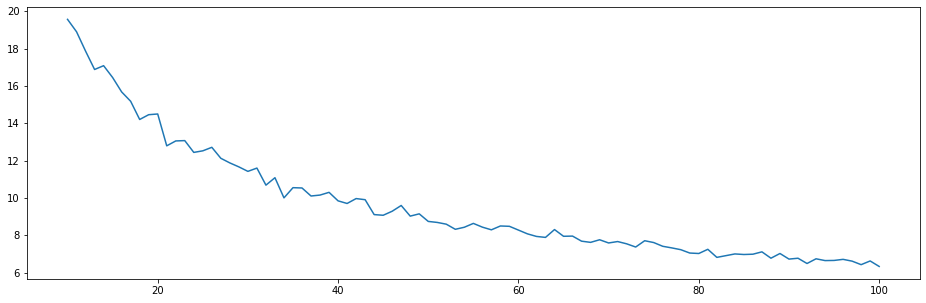

In [7]:
x, y = zip(*dist.items())
plt.figure(figsize=(16,5))
plt.plot(x, y)